### Find transformation using Scipy minimize

To find out what are realistic lightning changes, we will take images of a card for different lightning conditions (X and Xi) and we use least square optimization to find an affine transformation T that relates those images 
X' = TX

### Magics

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

%load_ext watermark
%watermark -a 'Salomon Tetelepta' -d -t -v -p tensorflow,numpy,pandas,matplotlib -g

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Salomon Tetelepta 2019-09-28 08:54:45 

CPython 3.7.4
IPython 7.7.0

tensorflow 1.14.0
numpy 1.16.4
pandas 0.25.0
matplotlib 3.1.1
Git hash: ad081f8902f4a6d83752c53fe7d4807773a21ad1


### Imports

In [5]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt 

In [6]:
def plot_points(a, marker, label=""):
    plt.plot(a[:, 0], a[:, 1], linestyle="None", marker=marker, markersize=12, alpha=0.8, label=label)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)

#### Toy example

Find transformation matrix, that transforms a to b, with (b = a * T_u). T_u is unknown, so the goal is to find a matrix T that is as close to T_u as possible.

To find it, we setup an objective function: b - a * T

In [91]:
a = np.array([[1, 4], [3, 3], [2, 3], [2, 3]])
T_u = np.array([[1.4, 0.5], [-2, 1.6]])
b = np.dot(a, T_u)

In [92]:
def objective(t, a, b):
    t = t.reshape(2, 2)
    value = np.sum(np.abs(b - np.dot(a, t)))
    #print(value)
    return value

In [93]:
x0 = np.array([[1, 0], [0, 1]])
objective(x0, a, b)
bv = (-10., 10.)
bnds = (bv, bv, bv, bv)

In [117]:
sol = minimize(objective, x0, method='SLSQP', args=(a, b), bounds=bnds)

In [118]:
T = np.round(sol.x, 3).reshape(2, 2)
print("T_u:")
print(T_u)
print("T:")
print(T)

T_u:
[[ 1.4  0.5]
 [-2.   1.6]]
T:
[[ 1.4  0.5]
 [-2.   1.6]]


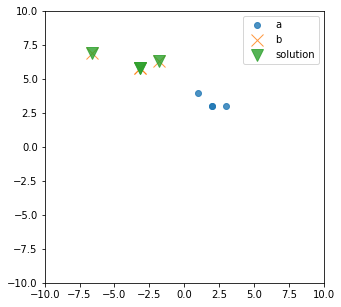

In [119]:
plt.figure(figsize=(5, 5))
plot_points(a, marker=".", label="a")
plot_points(b, marker="x", label="b")
plot_points(np.dot(a, T), marker="v", label="solution")
plt.legend()
plt.show()